In [53]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection  import cross_val_score


from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve

In [54]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df['Class'] = df['Class'].astype('category')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   Time    284807 non-null  float64 
 1   V1      284807 non-null  float64 
 2   V2      284807 non-null  float64 
 3   V3      284807 non-null  float64 
 4   V4      284807 non-null  float64 
 5   V5      284807 non-null  float64 
 6   V6      284807 non-null  float64 
 7   V7      284807 non-null  float64 
 8   V8      284807 non-null  float64 
 9   V9      284807 non-null  float64 
 10  V10     284807 non-null  float64 
 11  V11     284807 non-null  float64 
 12  V12     284807 non-null  float64 
 13  V13     284807 non-null  float64 
 14  V14     284807 non-null  float64 
 15  V15     284807 non-null  float64 
 16  V16     284807 non-null  float64 
 17  V17     284807 non-null  float64 
 18  V18     284807 non-null  float64 
 19  V19     284807 non-null  float64 
 20  V20     284807 non-null  f

In [7]:
df['Class'] = df['Class'].cat.rename_categories({1:'Fraudulent',0:'Non_Fraudulent'})

In [8]:
df['Class']

0         Non_Fraudulent
1         Non_Fraudulent
2         Non_Fraudulent
3         Non_Fraudulent
4         Non_Fraudulent
               ...      
284802    Non_Fraudulent
284803    Non_Fraudulent
284804    Non_Fraudulent
284805    Non_Fraudulent
284806    Non_Fraudulent
Name: Class, Length: 284807, dtype: category
Categories (2, object): ['Non_Fraudulent', 'Fraudulent']

In [9]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
print(normal_share)
fraud_share=classes[1]/df['Class'].count()*100
print(fraud_share)

99.82725143693798
0.1727485630620034


In [10]:
#Creating a df for percentage of each class
class_share = {'Class':['fraudulent','non_fraudulent'],'Percentage':[fraud_share,normal_share]}
class_share = pd.DataFrame(class_share)
class_share.head()

,Class,Percentage
0,fraudulent,0.172749
1,non_fraudulent,99.827251


G:\ANACONDA\envs\MiniProject\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


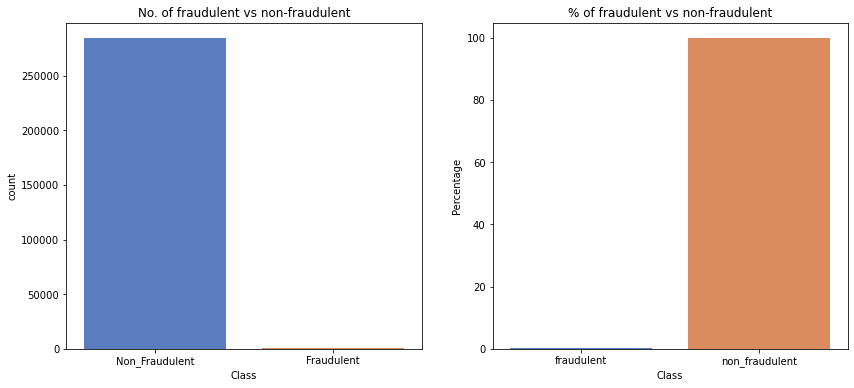

In [11]:
sns.set_palette("muted")
plt.figure(figsize=(14,6))
plt.subplot(121)
sns.countplot('Class',data=df)
plt.title('No. of fraudulent vs non-fraudulent')

plt.subplot(122)
sns.barplot(x='Class', y='Percentage',data=class_share)
plt.title('% of fraudulent vs non-fraudulent')
plt.show()


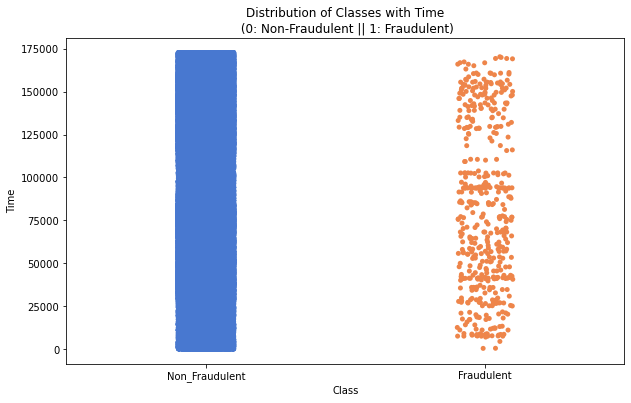

In [12]:
plt.figure(figsize=(10,6))
sns.stripplot(x= 'Class', y= 'Time',data=df)
plt.title('Distribution of Classes with Time\n (0: Non-Fraudulent || 1: Fraudulent)')
plt.show()

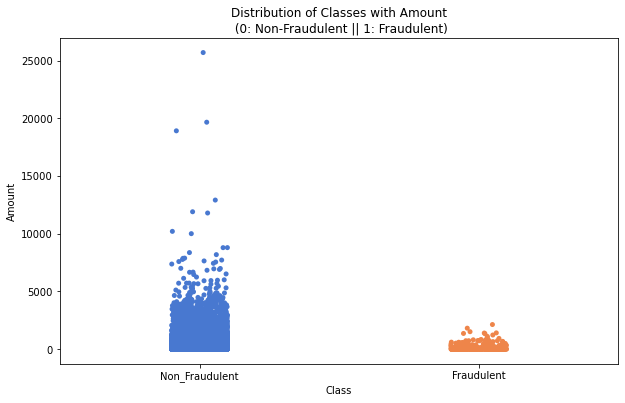

In [13]:
# Create a scatter plot to observe the distribution of classes with Amount
plt.figure(figsize=(10,6))
sns.stripplot(x= 'Class', y= 'Amount',data=df)
plt.title('Distribution of Classes with Amount\n (0: Non-Fraudulent || 1: Fraudulent)')
plt.show()

In [14]:
df=df.drop('Time',axis=1)
df.shape

(284807, 30)

In [15]:
X = df.iloc[:,:-1]
y= df.iloc[:,-1] #class variable

In [16]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)

In [17]:
print('Total count for each class:\n', y.value_counts())
print("\nCount of each class in train data:\n",y_train.value_counts())
print("\nCount of each class in test data:\n",y_test.value_counts())

Total count for each class:
 Non_Fraudulent    284315
Fraudulent           492
Name: Class, dtype: int64

Count of each class in train data:
 Non_Fraudulent    227451
Fraudulent           394
Name: Class, dtype: int64

Count of each class in test data:
 Non_Fraudulent    56864
Fraudulent           98
Name: Class, dtype: int64


G:\ANACONDA\envs\MiniProject\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
G:\ANACONDA\envs\MiniProject\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
G:\ANACONDA\envs\MiniProject\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

G:\ANACONDA\envs\MiniProject\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
G:\ANACONDA\envs\MiniProject\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
G:\ANACONDA\envs\MiniProject\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

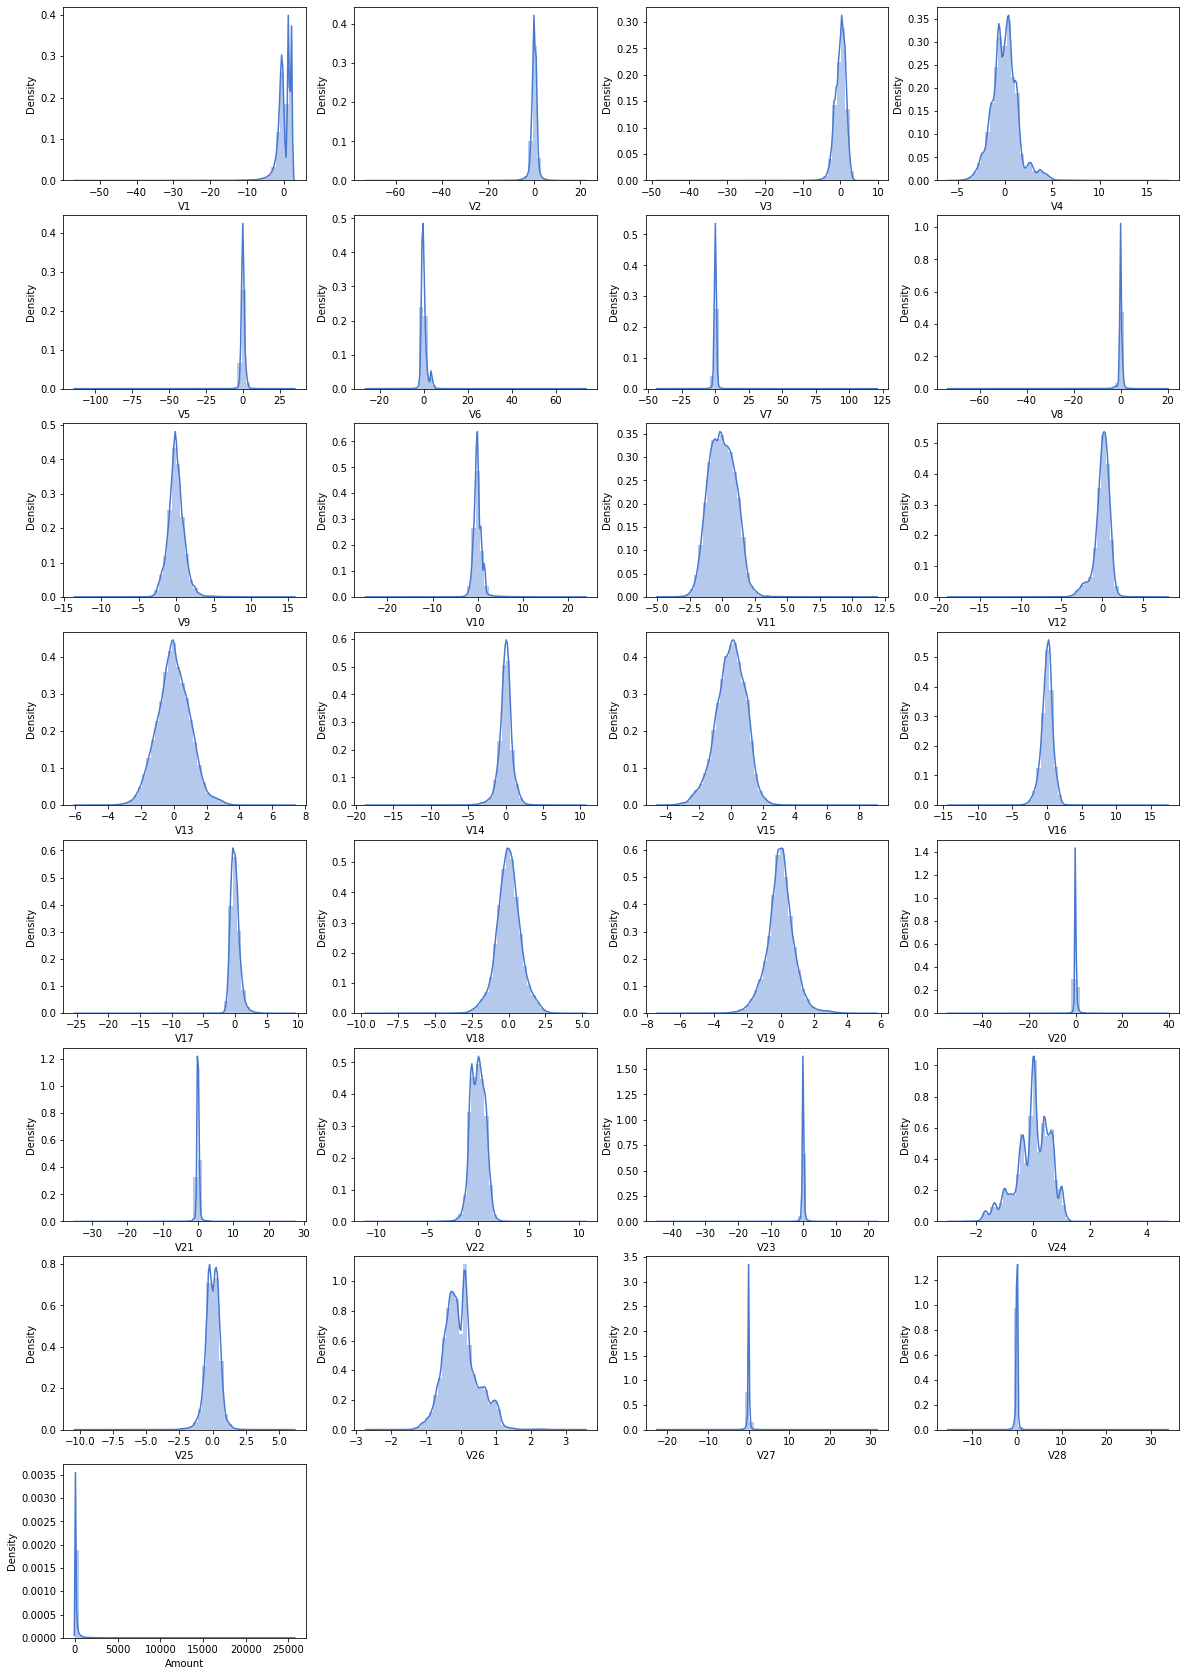

In [18]:
collist = list(X_train.columns)

c = len(collist)
m = 1
n = 0

plt.figure(figsize=(20,30))

for i in collist:
  if m in range(1,c+1):
    plt.subplot(8,4,m)
    sns.distplot(X_train[X_train.columns[n]])
    m=m+1
    n=n+1

plt.show()

In [19]:
from sklearn.preprocessing import power_transform

X_train = power_transform(X_train,method='yeo-johnson')
X_test = power_transform(X_test,method='yeo-johnson')

In [20]:
cols = X.columns

X_train = pd.DataFrame(X_train)
X_train.columns = cols

X_test = pd.DataFrame(X_test)
X_test.columns = cols

G:\ANACONDA\envs\MiniProject\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
G:\ANACONDA\envs\MiniProject\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
G:\ANACONDA\envs\MiniProject\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

G:\ANACONDA\envs\MiniProject\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
G:\ANACONDA\envs\MiniProject\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
G:\ANACONDA\envs\MiniProject\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

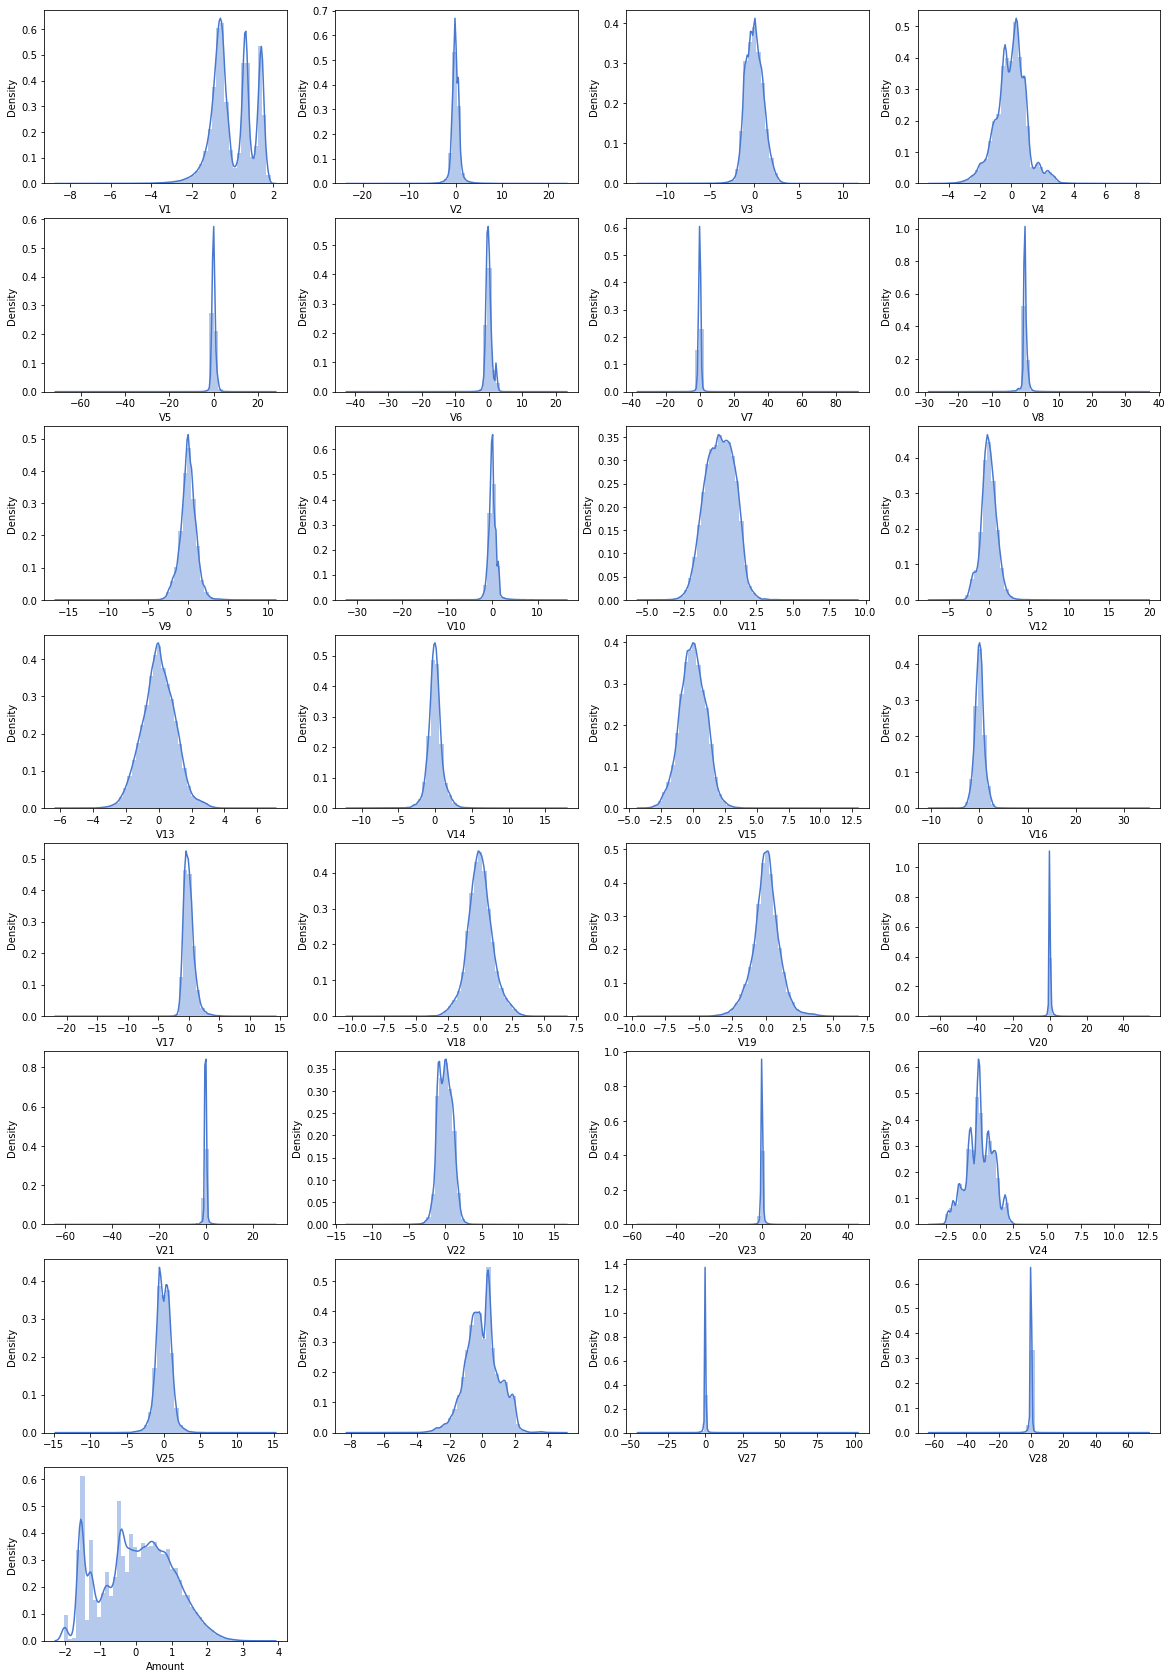

In [21]:
collist = list(X_train.columns)

c = len(collist)
m = 1
n = 0

plt.figure(figsize=(20,30))

for i in collist:
  if m in range(1,c+1):
    plt.subplot(8,4,m)
    sns.distplot(X_train[X_train.columns[n]])
    m=m+1
    n=n+1

plt.show()

In [22]:
# Function to plot ROC curve and classification score which will be used for each model

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

def plot_roc(fpr,tpr):
    plt.plot(fpr, tpr, color='green', label='ROC')
    plt.plot([0, 1], [0, 1], color='yellow', linestyle='--')
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

def clf_score(clf):
    prob = clf.predict_proba(X_test)
    prob = prob[:, 1]
    auc = roc_auc_score(y_test, prob)    
    print('AUC: %.2f' % auc)
    fpr, tpr, thresholds = roc_curve(y_test,prob, pos_label='Non_Fraudulent')
    plot_roc(fpr,tpr)
    predicted=clf.predict(X_test)
    report = classification_report(y_test, predicted)
    print(report)
    return auc

## LOGISTIC REGRESSION

In [23]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression #import the package
from sklearn.model_selection import GridSearchCV

In [24]:
num_C = [0.001,0.01,0.1,1,10,100] #--> list of values

for cv_num in num_C:
  clf = LogisticRegression(penalty='l2',C=cv_num,random_state = 0)
  clf.fit(X_train, y_train)
  print('C:', cv_num)
  print('Coefficient of each feature:', clf.coef_)
  print('Training accuracy:', clf.score(X_train, y_train))
  print('Test accuracy:', clf.score(X_test, y_test))
  print('Predicted',clf.predict(y_test))
  print('')

C: 0.001
Coefficient of each feature: [[ 0.05827245 -0.03231278  0.15258413 -0.2303827  -0.03251785  0.04418223
   0.06092596  0.1053219   0.11901376  0.23577848 -0.17897772  0.23620764
   0.0429589   0.40046756  0.01684527  0.118289    0.11039617  0.00086577
   0.00221737 -0.01263307 -0.02883974 -0.03215089  0.03304381  0.02416244
   0.00155655 -0.01639013 -0.00758294  0.00107762  0.01629961]]
Training accuracy: 0.9990344313019817
Test accuracy: 0.9988939995084443

C: 0.01
Coefficient of each feature: [[ 0.15546705  0.08584789  0.26579153 -0.5753725  -0.01738138 -0.03487857
   0.11891721  0.19132465  0.16632621  0.22402918 -0.16014372  0.44675414
   0.14777179  0.65203773  0.11114447  0.20586739  0.02118281 -0.0613255
   0.05790786  0.00283988 -0.04986379 -0.1719924   0.0859131  -0.00722106
  -0.04617946 -0.0330326   0.05303883  0.03400267 -0.00360083]]
Training accuracy: 0.999223156092958
Test accuracy: 0.9990695551420246

C: 0.1
Coefficient of each feature: [[ 0.21452937  0.22263954

In [ ]:
import seaborn as sns
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, knn_predicted_test_labels)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [25]:
grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}  # l2 ridge

lsr = LogisticRegression()
clf_lsr_cv = GridSearchCV(lsr,grid,cv=3,scoring='roc_auc')
clf_lsr_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",clf_lsr_cv.best_params_)
print("accuracy :",clf_lsr_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2'}
accuracy : 0.9803975962273005


AUC: 0.98


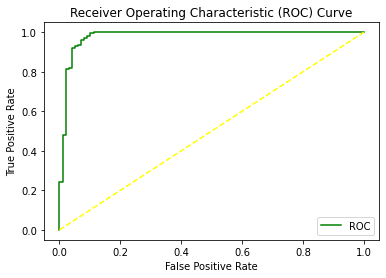

                precision    recall  f1-score   support

    Fraudulent       0.87      0.54      0.67        98
Non_Fraudulent       1.00      1.00      1.00     56864

      accuracy                           1.00     56962
     macro avg       0.93      0.77      0.83     56962
  weighted avg       1.00      1.00      1.00     56962



0.9799370930139079

In [26]:
lsr_best = LogisticRegression(penalty='l2',C=0.01,random_state = 0)
lsr_clf = lsr_best.fit(X_train,y_train)
clf_score(lsr_clf)

KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection  import cross_val_score
from sklearn.metrics import accuracy_score, mean_squared_error

# Taking only odd integers as K values to apply the majority rule. 
k_range = np.arange(1, 20, 2)
scores = [] #to store cross val score for each k
k_range

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])

AUC: 0.94


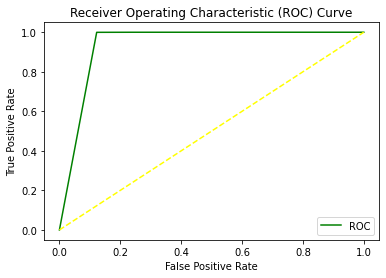

                precision    recall  f1-score   support

    Fraudulent       0.96      0.77      0.85        98
Non_Fraudulent       1.00      1.00      1.00     56864

      accuracy                           1.00     56962
     macro avg       0.98      0.88      0.93     56962
  weighted avg       1.00      1.00      1.00     56962



In [35]:
# Finding the best k with stratified K-fold method. 
# We will use cv=3 in cross_val_score to specify the number of folds in the (Stratified)KFold.

#for k in k_range:
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train,y_train)
score = cross_val_score(knn_clf, X_train, y_train, cv=3, n_jobs = -1)
scores.append(score.mean())
clf_score(knn_clf)

#Storing the mean squared error to decide optimum k
mse = [1-x for x in scores]

G:\ANACONDA\envs\MiniProject\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


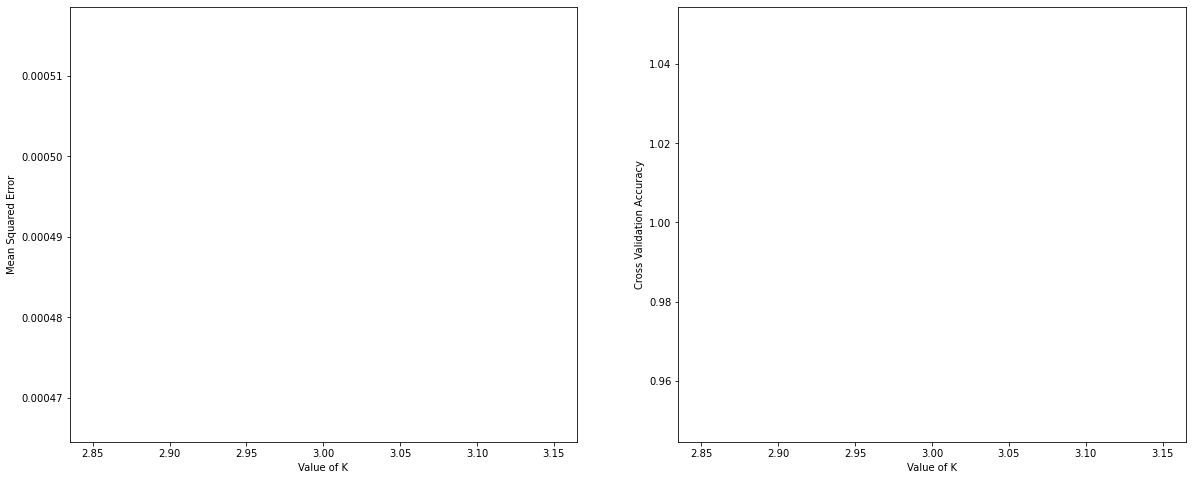

In [38]:
#Plotting a line plot to decide optimum value of K

plt.figure(figsize=(20,8))
plt.subplot(121)
sns.lineplot(3,mse,markers=True,dashes=False)
plt.xlabel("Value of K")
plt.ylabel("Mean Squared Error")
plt.subplot(122)
sns.lineplot(3,scores,markers=True,dashes=False)
plt.xlabel("Value of K")
plt.ylabel("Cross Validation Accuracy")
plt.show()

In [39]:
knn = KNeighborsClassifier(n_neighbors=3)

knn_clf = knn.fit(X_train,y_train)

AUC: 0.94


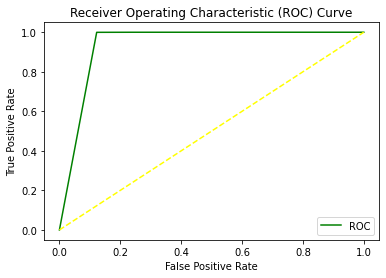

                precision    recall  f1-score   support

    Fraudulent       0.96      0.77      0.85        98
Non_Fraudulent       1.00      1.00      1.00     56864

      accuracy                           1.00     56962
     macro avg       0.98      0.88      0.93     56962
  weighted avg       1.00      1.00      1.00     56962

0.938721047999954


In [40]:
print(clf_score(knn_clf))

In [43]:
pred=knn.predict(X_test)
knn_accuracy_score = accuracy_score(y_test,pred)
print(knn_accuracy_score)

0.9995435553526912


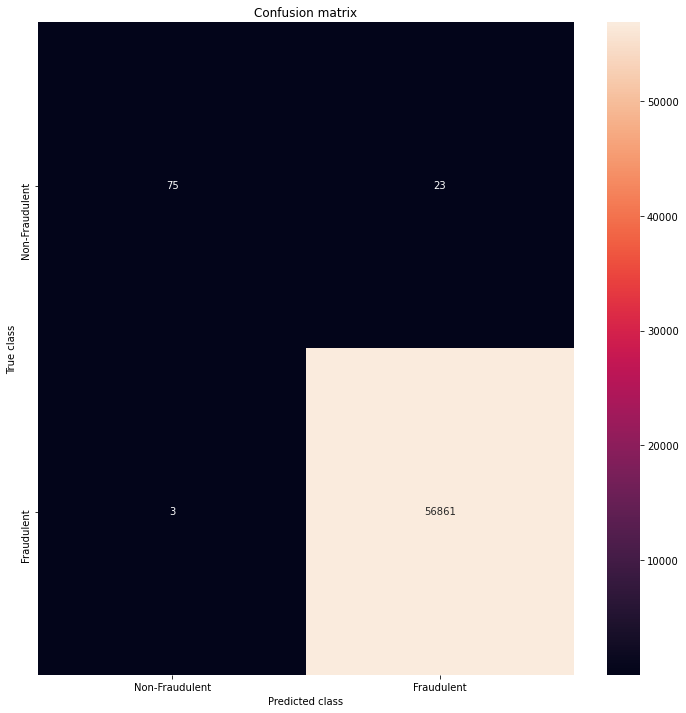

In [46]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
LABELS = ['Non-Fraudulent', 'Fraudulent']
conf_matrix = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

## DECISION TREE

In [47]:
from sklearn import tree
from pprint import pprint

## BALANCED DATASET

In [55]:
df = df.sample(frac=1)

frauds = df[df['Class'] == 1]
non_frauds = df[df['Class'] == 0][:492]

new_df = pd.concat([non_frauds, frauds])
# Shuffle dataframe rows
new_df = new_df.sample(frac=1, random_state=42)

new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
153835,100298.0,-22.341889,15.536133,-22.865228,7.043374,-14.183129,-0.463145,-28.215112,-14.607791,-9.481456,...,-9.110423,4.158895,1.412928,0.382801,0.447154,-0.632816,-4.380154,-0.467863,1.00,1
89447,62580.0,-1.528892,1.547631,0.867550,1.676915,-0.160825,0.043095,0.145268,-0.944621,0.409607,...,0.803862,0.244013,0.271427,0.415023,-0.595199,-0.272205,-0.155960,0.407708,5.42,0
142557,84789.0,-1.430864,-0.802529,1.123320,0.389760,-0.281214,-0.055123,1.326232,0.195700,-0.546890,...,0.325575,0.014002,0.844946,0.114963,0.156365,-0.619437,-0.120351,0.035594,354.33,1
78481,57548.0,0.698525,-0.623247,1.470892,3.201555,-1.166372,0.667130,-0.461249,0.264914,0.781957,...,-0.195623,-0.621337,-0.131347,0.395203,0.321602,-0.078564,0.019487,0.066011,201.57,0
213775,139389.0,-0.876148,1.045461,1.273240,1.657455,-1.067039,1.262843,0.582252,-0.092462,-0.133993,...,0.150437,0.838878,-0.098471,-0.385105,-0.897054,-0.470444,-0.710263,-0.306786,175.75,0


Text(0, 0.5, 'Frequency')

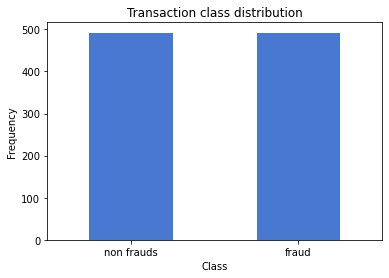

In [56]:
labels = ['non frauds','fraud']
classes = pd.value_counts(new_df['Class'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [57]:
features = new_df.drop(['Class'], axis = 1)
labels = pd.DataFrame(new_df['Class'])

feature_array = features.values
label_array = labels.values

In [59]:
from sklearn.preprocessing import normalize
X_train,X_test,y_train,y_test = train_test_split(feature_array,label_array,test_size=0.20)
X_train = normalize(X_train)
X_test=normalize(X_test)

In [61]:
depth_score=[]
dep_rng = [x for x in range(1,20)]
for i in dep_rng:
  clf = tree.DecisionTreeClassifier(max_depth=i)
  score_tree = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=5, n_jobs=-1)
  depth_score.append(score_tree.mean())
print(depth_score)

[0.9072079335644603, 0.9008788196404096, 0.9174232040635332, 0.9110779650084657, 0.913633798274611, 0.9085382568733371, 0.9034830282996049, 0.9060146738692252, 0.9009110699024431, 0.9085705071353705, 0.9034749657340967, 0.9034830282996051, 0.8996533096831412, 0.8983955494638394, 0.9034991534306217, 0.9022091429492864, 0.9009271950334596, 0.8882125292268, 0.900911069902443]


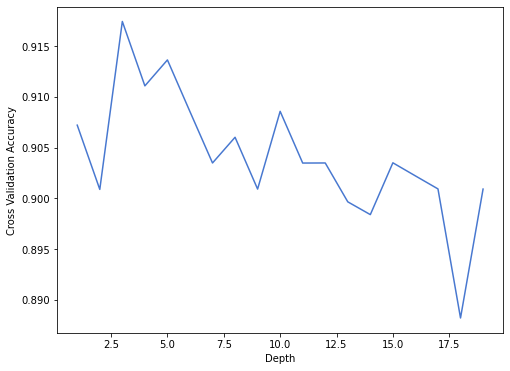

In [63]:
plt.figure(figsize=(8,6))
sns.lineplot(dep_rng,depth_score,markers=True,dashes=False)
plt.xlabel("Depth")
plt.ylabel("Cross Validation Accuracy")

plt.show()

In [66]:
dt = tree.DecisionTreeClassifier(max_depth = 5)
dt_clf = dt.fit(X_train,y_train)

In [68]:
pred=dt_clf.predict(X_test)
dt_accuracy_score = accuracy_score(y_test,pred)
print(dt_accuracy_score)

0.8984771573604061


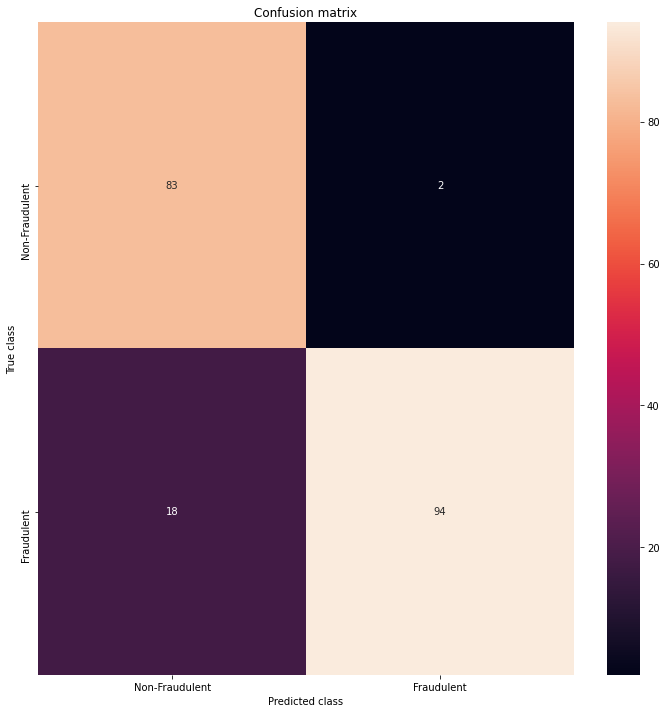

In [69]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
LABELS = ['Non-Fraudulent', 'Fraudulent']
conf_matrix = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

## UNBALANCED DATASET

In [70]:
depth_score=[]
dep_rng = [x for x in range(1,20)]
for i in dep_rng:
  clf = tree.DecisionTreeClassifier(max_depth=i)
  score_tree = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=5, n_jobs=-1)
  depth_score.append(score_tree.mean())
print(depth_score[0:4])

[0.9072079335644603, 0.9008788196404096, 0.9174232040635332, 0.9110940901394823]


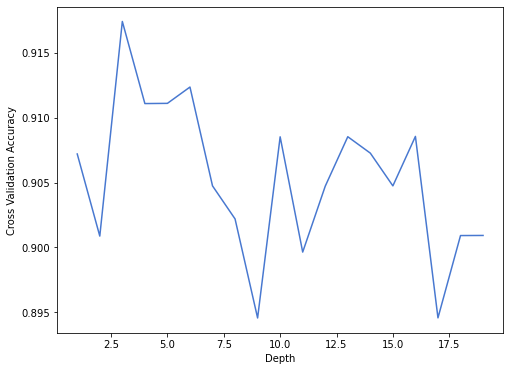

In [72]:
plt.figure(figsize=(8,6))
sns.lineplot(dep_rng,depth_score,markers=True,dashes=False)
plt.xlabel("Depth")
plt.ylabel("Cross Validation Accuracy")

plt.show()

In [73]:
dt = tree.DecisionTreeClassifier(max_depth = 5)
dt_clf = dt.fit(X_train,y_train)

In [74]:
pred=dt_clf.predict(X_test)
dt_accuracy_score = accuracy_score(y_test,pred)
print(dt_accuracy_score)

0.9035532994923858


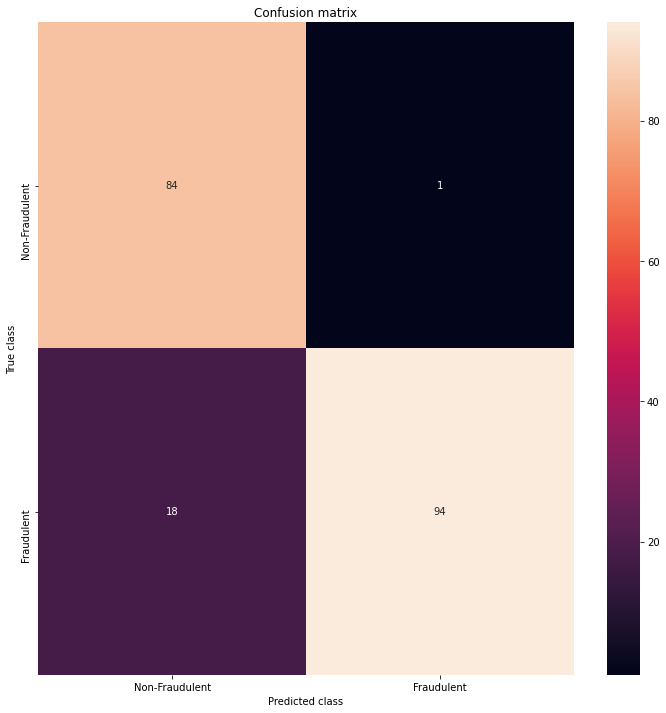

In [75]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
LABELS = ['Non-Fraudulent', 'Fraudulent']
conf_matrix = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

AUC: 0.88


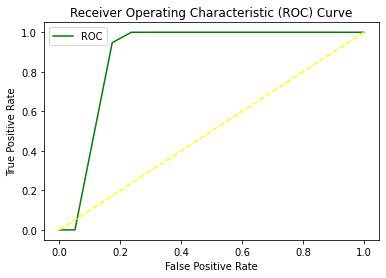

                precision    recall  f1-score   support

    Fraudulent       0.91      0.71      0.80        98
Non_Fraudulent       1.00      1.00      1.00     56864

      accuracy                           1.00     56962
     macro avg       0.95      0.86      0.90     56962
  weighted avg       1.00      1.00      1.00     56962



0.8828204853973103

In [33]:
dt = tree.DecisionTreeClassifier(max_depth = 5)
dt_clf = dt.fit(X_train,y_train)

#Plotting ROC
clf_score(dt_clf)